You are given an integer n. There is an undirected graph with n vertices, numbered from 0 to n - 1. You are given a 2D integer array edges where edges[i] = [ai, bi] denotes that there exists an undirected edge connecting vertices ai and bi.

Return the number of complete connected components of the graph.

A connected component is a subgraph of a graph in which there exists a path between any two vertices, and no vertex of the subgraph shares an edge with a vertex outside of the subgraph.

A connected component is said to be complete if there exists an edge between every pair of its vertices.

 

Example 1:

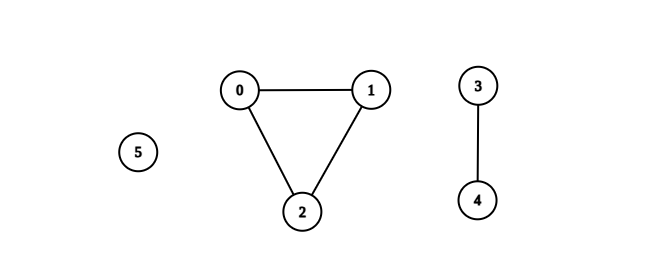

Input: n = 6, edges = [[0,1],[0,2],[1,2],[3,4]]
Output: 3
Explanation: From the picture above, one can see that all of the components of this graph are complete.

Example 2:

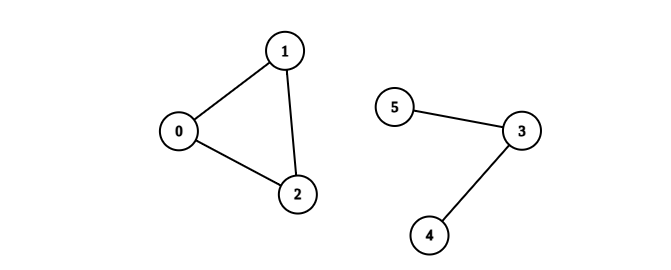

Input: n = 6, edges = [[0,1],[0,2],[1,2],[3,4],[3,5]]
Output: 1
Explanation: The component containing vertices 0, 1, and 2 is complete since there is an edge between every pair of two vertices. On the other hand, the component containing vertices 3, 4, and 5 is not complete since there is no edge between vertices 4 and 5. Thus, the number of complete components in this graph is 1.

 

Constraints:

    1 <= n <= 50
    0 <= edges.length <= n * (n - 1) / 2
    edges[i].length == 2
    0 <= ai, bi <= n - 1
    ai != bi
    There are no repeated edges.



In [ ]:
class UF:
    def __init__(self, n):
        self.parents = list(range(n))
        self.edges = [0] * n
        self.nodes = [1] * n
        self.degree = [0] * n

    def union(self, i, j):
        pi = self.parent(i)
        pj = self.parent(j)
        if pi != pj:
            if self.degree[pj] > self.degree[pi]:
                pi, pj = pj, pi
            self.parents[pj] = pi
            self.edges[pi] += self.edges[pj]
            self.nodes[pi] += self.nodes[pj]
        self.edges[pi] += 1

    def parent(self, i):
        if self.parents[i] == i:
            return i
        return self.parent(self.parents[i])

    def analyze(self):
        ans = 0
        for i in range(len(self.parents)):
            if self.parent(i) == i:
                nodes = self.nodes[i]
                edges = self.edges[i]
                if edges == (nodes * (nodes - 1)) // 2:
                    ans += 1
        return ans


class Solution:
    def countCompleteComponents(self, n: int, edges: List[List[int]]) -> int:
        uf = UF(n)
        for i, j in edges:
            uf.union(i, j)
        return uf.analyze()

In [ ]:
class Solution:
    def countCompleteComponents(self, n: int, edges: List[List[int]]) -> int:
        # Adjacency lists for each vertex
        graph = [[] for _ in range(n)]
        # Map to store frequency of each unique adjacency list
        component_freq = defaultdict(int)

        # Initialize adjacency lists with self-loops
        for vertex in range(n):
            graph[vertex] = [vertex]

        # Build adjacency lists from edges
        for v1, v2 in edges:
            graph[v1].append(v2)
            graph[v2].append(v1)

        # Count frequency of each unique adjacency pattern
        for vertex in range(n):
            neighbors = tuple(sorted(graph[vertex]))
            component_freq[neighbors] += 1

        # Count complete components where size equals frequency
        return sum(
            1
            for neighbors, freq in component_freq.items()
            if len(neighbors) == freq
        )